# Deep Fakes (3/3) - Face Swapping stage

# Imports

In [24]:
!pip uninstall -y numpy pandas keras  matplotlib opencv-python dlib 

Found existing installation: numpy 2.2.0
Uninstalling numpy-2.2.0:
  Successfully uninstalled numpy-2.2.0
Found existing installation: keras 3.7.0
Uninstalling keras-3.7.0:
  Successfully uninstalled keras-3.7.0
Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: dlib 19.24.6
Uninstalling dlib-19.24.6:
  Successfully uninstalled dlib-19.24.6


In [25]:
!pip install numpy==1.19.5 pandas==1.1.5 keras==2.4.3 matplotlib==3.3.3 opencv-python==4.5.1.48 dlib==19.21.1 

  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pandas-1.1.5.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Keras-2.4.3-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached matplotlib-3.3.3.tar.gz (37.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached opencv-python-4.5.1.48.tar.gz (88.3 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [840 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "linux" and platform_machine == "aarc

In [14]:
!pip install dlib

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp310-cp310-linux_x86_64.whl size=3590649 sha256=ac90f872420d91951a7084d3511deb09234328b74a9582127e2aa2467966ad1c
  Stored in directory: /root/.cache/pip/wheels/7c/1d/d1/e69ceb001441acedfa6156acda6c1856699e260ea1a9e6dcc4
Successfully built dlib


In [21]:
!pip install opencv-python opencv-python-headless

In [26]:
import numpy as np
import pandas as pd
import keras
import tensorflow
from tensorflow.keras.models import load_model
import gc
import matplotlib.pyplot as plt
import cv2
import os
import dlib
from IPython.display import clear_output

# Directories creation

In [27]:
def create_and_list_directories(base_path, directories):
    # Create directories
    print("\nCreating directories...\n")
    for directory in directories:
        dir_path = os.path.join(base_path, directory)
        try:
            os.makedirs(dir_path, exist_ok=True)
            print(f"✅ Successfully created: {dir_path}")
        except Exception as e:
            print(f" Failed to create {dir_path}: {e}")

    # List contents of the base directory
    print("\nListing contents of the base directory...\n")
    try:
        contents = os.listdir(base_path)
        if contents:
            for idx, item in enumerate(contents, 1):
                print(f"{idx}. {item}")
        else:
            print("The directory is empty.")
    except Exception as e:
        print(f" Failed to list contents of {base_path}: {e}")

# Define the working directory and directories to create
working_dir = "/kaggle/working"
directories_to_create = ["frames", "results", "transformed", "final"]

# Execute the process
create_and_list_directories(working_dir, directories_to_create)



Creating directories...

✅ Successfully created: /kaggle/working/frames
✅ Successfully created: /kaggle/working/results
✅ Successfully created: /kaggle/working/transformed
✅ Successfully created: /kaggle/working/final

Listing contents of the base directory...

1. transformed
2. final
3. results
4. frames
5. .virtual_documents


# Frames extraction

In [28]:
import cv2
import os
from tqdm import tqdm

def extract_frames(input_path, output_path):
    # Create output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Open the video file
    videocapture = cv2.VideoCapture(input_path)
    frame_count = int(videocapture.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames

    if frame_count == 0:
        print(" No frames found in the video. Please check the input file.")
        return 0

    print(f" Extracting frames from: {input_path}")
    print(f" Saving frames to: {output_path}")
    print(" Progress:")

    # Progress bar for frame extraction
    success, image = videocapture.read()
    count = 0

    with tqdm(total=frame_count, desc="Processing Frames", bar_format="{l_bar}{bar} | {n_fmt}/{total_fmt} Frames") as pbar:
        while success:
            frame_filename = os.path.join(output_path, f"{count:04d}.jpg")
            cv2.imwrite(frame_filename, image)  # Save frame as JPEG
            success, image = videocapture.read()
            count += 1
            pbar.update(1)

    print(f"\n✅ Frames extraction complete! Total frames extracted: {count}")
    return count

# Paths
input_path = '/kaggle/input/faceswap-video/FaceSwap Video Data/Dulaj1.mp4'
output_path = '/kaggle/working/frames/'

# Run the function
frames = extract_frames(input_path, output_path)


AttributeError: module 'cv2' has no attribute 'VideoCapture'

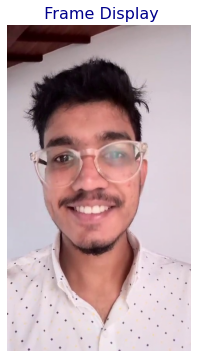

In [6]:
import matplotlib.pyplot as plt
import cv2

def display_frame(image_path):
    try:
        # Read and process the image
        image = cv2.imread(image_path)
        if image is None:
            print(f" Error: Unable to load image at {image_path}")
            return
        
        # Convert the image to RGB format for matplotlib
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.figure(figsize=(8, 6))  # Set a larger figure size for better visualization
        plt.imshow(image)
        plt.axis('off')  # Turn off the axis for a cleaner look
        plt.title(" Frame Display", fontsize=16, color="darkblue")
        plt.show()
        
    except Exception as e:
        print(f" An error occurred while displaying the frame: {e}")

# Path to the frame
image_path = '/kaggle/working/frames/0120.jpg'

# Display the frame
display_frame(image_path)


# Faces extraction

In [7]:
pip install  mtcnn==0.1.1

     |████████████████████████████████| 2.3 MB 5.3 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


🔍 Loading and processing the image...
Detecting faces...
Cropping and resizing the face...


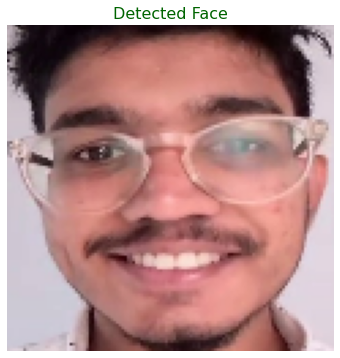

In [8]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

def detect_and_display_face(image_path, output_size=(120, 120)):
    try:
        # Load and process the image
        print("🔍 Loading and processing the image...")
        image = cv2.imread(image_path)
        if image is None:
            print(f" Error: Unable to load image at {image_path}")
            return

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Detect faces using MTCNN
        print("Detecting faces...")
        detector = MTCNN()
        detections = detector.detect_faces(image)

        if not detections:
            print("No faces detected in the image.")
            return

        # Extract the bounding box of the first detected face
        x, y, width, height = detections[0]['box']
        x1, y1, x2, y2 = x - 10, y - 10, x - 10 + width + 20, y - 10 + height + 20

        # Crop and resize the face
        print("Cropping and resizing the face...")
        face = image[y1:y2, x1:x2]
        face = cv2.resize(face, output_size, interpolation=cv2.INTER_LINEAR)

        # Display the face
        plt.figure(figsize=(6, 6))
        plt.imshow(face)
        plt.axis('off')
        plt.title("Detected Face", fontsize=16, color="darkgreen")
        plt.show()
        print("")

    except Exception as e:
        print(f"An error occurred: {e}")

# Path to the image
image_path = '/kaggle/working/frames/0120.jpg'

# Run the function
detect_and_display_face(image_path)


In [9]:
from mtcnn import MTCNN
import cv2
import os
from tqdm import tqdm

def extract_faces(source, destination, detector):
    # Ensure the destination directory exists
    os.makedirs(destination, exist_ok=True)
    
    counter = 0
    total_files = sum(len(files) for _, _, files in os.walk(source))

    print(f"Starting face extraction from {source}")
    print(f"Faces will be saved to: {destination}")
    print("Progress:")

    # Loop through the source directory
    for dirname, _, filenames in os.walk(source):
        for filename in tqdm(filenames, desc="Processing Images", unit="image", bar_format="{l_bar}{bar} | {n_fmt}/{total_fmt}"):
            try:
                # Read and process the image
                image_path = os.path.join(dirname, filename)
                image = cv2.imread(image_path)
                if image is None:
                    continue
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # Detect faces
                detections = detector.detect_faces(image)
                if not detections:
                    continue  # Skip images without faces
                
                # Extract and resize the first detected face
                x, y, width, height = detections[0]['box']
                x1, y1, x2, y2 = x - 10, y - 10, x - 10 + width + 20, y - 10 + height + 20
                face = image[y1:y2, x1:x2]
                face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                
                # Save the extracted face
                face_path = os.path.join(destination, filename)
                plt.imsave(face_path, face)
                
                # Increment the counter
                counter += 1
            except Exception as e:
                print(f"Skipping {filename} due to an error: {e}")

    # Final status message
    print(f"\n✅ Extraction complete! {counter}/{total_files} faces were successfully extracted.")


detector = MTCNN()
extract_faces('/kaggle/working/frames/', '/kaggle/working/results/',detector)

Processing Images:   0%|           | 0/184

Starting face extraction from /kaggle/working/frames/
Faces will be saved to: /kaggle/working/results/
Progress:


Processing Images: 100%|██████████ | 184/184


✅ Extraction complete! 184/184 faces were successfully extracted.


🔍 Loading image from: /kaggle/working/results/0120.jpg


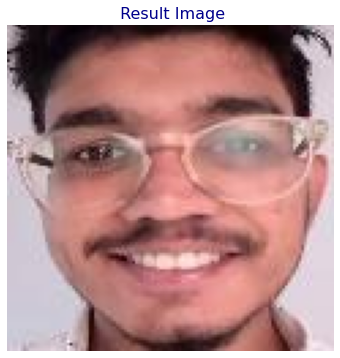

In [10]:
import matplotlib.pyplot as plt
import cv2

def display_image(image_path, title="Image Display"):
    try:
        # Read the image
        print(f"🔍 Loading image from: {image_path}")
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Error: Unable to load the image at {image_path}. Please check the path.")
            return
        
        # Convert the image to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
        plt.imshow(image)
        plt.axis('off')  # Remove axis for cleaner display
        plt.title(f" {title}", fontsize=16, color="darkblue")
        plt.show()

    except Exception as e:
        print(f"An error occurred while displaying the image: {e}")

# Path to the image
image_path = '/kaggle/working/results/0120.jpg'

# Display the image
display_image(image_path, title="Result Image")


# Faces transformation

In [11]:
autoencoder_a = load_model("/kaggle/input/deepfake-models/keras/default/1/autoencoder_a.hdf5")
autoencoder_b = load_model("/kaggle/input/deepfake-models/keras/default/1/autoencoder_b.hdf5")

In [12]:
# LOADING THE ENCODER A
encoder_a = keras.Model(autoencoder_a.layers[1].input, autoencoder_a.layers[1].output)
# LOADING THE DECODER B
decoder_b = keras.Model(autoencoder_b.layers[2].input, autoencoder_b.layers[2].output)

In [13]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def face_transform(source, destination, encoder, decoder):
    # Ensure the destination directory exists
    os.makedirs(destination, exist_ok=True)
    
    counter = 0
    total_files = sum(len(files) for _, _, files in os.walk(source))
    
    print(f"Starting face transformation from: {source}")
    print(f"Transformed faces will be saved to: {destination}")
    print("Progress:")

    # Loop through the source directory
    for dirname, _, filenames in os.walk(source):
        for filename in tqdm(filenames, desc="Transforming Faces", unit="image", bar_format="{l_bar}{bar} | {n_fmt}/{total_fmt}"):
            try:
                # Load and preprocess the image
                image_path = os.path.join(dirname, filename)
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Skipping {filename}: Unable to load image.")
                    continue
                
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = image.astype('float32') / 255.0
                
                # Pass the image through the encoder and decoder
                encoded_image = encoder.predict(np.array([image]))
                decoded_image = decoder.predict(encoded_image)
                
                # Normalize and prepare the image for saving
                decoded_image = cv2.normalize(
                    decoded_image[0], None, alpha=0, beta=255,
                    norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F
                )
                decoded_image = decoded_image.astype(np.uint8)
                
                # Save the transformed image
                output_path = os.path.join(destination, filename)
                plt.imsave(output_path, decoded_image)
                
                counter += 1
            except Exception as e:
                print(f"Skipping {filename}: {e}")
                continue

    # Final status message
    print(f"\n✅ Transformation complete! {counter}/{total_files} images were successfully transformed.")


In [14]:
face_transform('/kaggle/working/results/','/kaggle/working/transformed',encoder_a,decoder_b)

Transforming Faces:   0%|           | 0/184

Starting face transformation from: /kaggle/working/results/
Transformed faces will be saved to: /kaggle/working/transformed
Progress:


Transforming Faces: 100%|██████████ | 184/184


✅ Transformation complete! 184/184 images were successfully transformed.


🔍 Loading transformed image from: /kaggle/working/transformed/0120.jpg


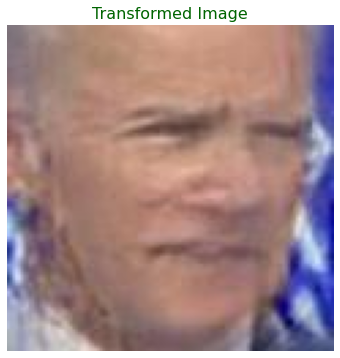

In [15]:
import cv2
import matplotlib.pyplot as plt

def display_transformed_image(image_path, title="Transformed Image"):
    try:
        # Read the image
        print(f"🔍 Loading transformed image from: {image_path}")
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Error: Unable to load the image at {image_path}. Please check the path.")
            return
        
        # Convert the image to RGB format for displaying
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.figure(figsize=(8, 6))  # Set a larger figure size for better visualization
        plt.imshow(image)
        plt.axis('off')  # Remove axes for a clean display
        plt.title(f"{title}", fontsize=16, color="darkgreen")
        plt.show()
    
    except Exception as e:
        print(f" An error occurred while displaying the image: {e}")

# Path to the transformed image
image_path = '/kaggle/working/transformed/0120.jpg'

# Display the transformed image
display_transformed_image(image_path)


# Face swapping

## Swapping faces massively

In [16]:
import os
from IPython.display import clear_output
import cv2
import dlib
import numpy as np
import gc

In [17]:
# Initialize global variables
PREDICTOR_PATH = '../input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat'
SCALE_FACTOR = 0.5
FEATHER_AMOUNT = 11

In [18]:
# Initialize detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

In [19]:
# Define landmarks
FACE_POINTS = list(range(17, 68))
MOUTH_POINTS = list(range(48, 61))
RIGHT_BROW_POINTS = list(range(17, 22))
LEFT_BROW_POINTS = list(range(22, 27))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))
NOSE_POINTS = list(range(27, 35))
JAW_POINTS = list(range(0, 17))

In [20]:
ALIGN_POINTS = (LEFT_BROW_POINTS + RIGHT_EYE_POINTS + LEFT_EYE_POINTS +
                RIGHT_BROW_POINTS + NOSE_POINTS + MOUTH_POINTS)

In [21]:
OVERLAY_POINTS = [
    LEFT_EYE_POINTS + RIGHT_EYE_POINTS + LEFT_BROW_POINTS + RIGHT_BROW_POINTS,
    NOSE_POINTS + MOUTH_POINTS,
]

In [22]:
COLOUR_CORRECT_BLUR_FRAC = 0.6

In [23]:
# Define helper functions
def get_landmarks(im):
    rects = detector(im, 1)
    if len(rects) > 1:
        raise Exception("Too many faces")
    if len(rects) == 0:
        raise Exception("No faces detected")
    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

In [24]:
def draw_convex_hull(im, points, color):
    points = cv2.convexHull(points)
    cv2.fillConvexPoly(im, points, color=color)

In [25]:
def get_face_mask(im, landmarks):
    im = np.zeros(im.shape[:2], dtype=np.float64)
    for group in OVERLAY_POINTS:
        draw_convex_hull(im, landmarks[group], color=1)
    im = np.array([im, im, im]).transpose((1, 2, 0))
    im = (cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0) > 0) * 1.0
    im = cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0)
    return im

In [26]:
def transformation_from_points(points1, points2):
    points1 = points1.astype(np.float64)
    points2 = points2.astype(np.float64)
    c1 = np.mean(points1, axis=0)
    c2 = np.mean(points2, axis=0)
    points1 -= c1
    points2 -= c2
    s1 = np.std(points1)
    s2 = np.std(points2)
    points1 /= s1
    points2 /= s2
    U, S, Vt = np.linalg.svd(points1.T * points2)
    R = (U * Vt).T
    return np.vstack([np.hstack(((s2 / s1) * R, c2.T - (s2 / s1) * R * c1.T)),
                      np.matrix([0., 0., 1.])])

In [27]:
def warp_im(im, M, dshape):
    output_im = np.zeros(dshape, dtype=im.dtype)
    cv2.warpAffine(im, M[:2], (dshape[1], dshape[0]), dst=output_im, 
                   borderMode=cv2.BORDER_TRANSPARENT, flags=cv2.WARP_INVERSE_MAP)
    return output_im

In [28]:
def correct_colours(im1, im2, landmarks1):
    blur_amount = COLOUR_CORRECT_BLUR_FRAC * np.linalg.norm(
        np.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
        np.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
    blur_amount = int(blur_amount)
    if blur_amount % 2 == 0:
        blur_amount += 1
    im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
    im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)
    im2_blur += (128 * (im2_blur <= 1.0)).astype(im2_blur.dtype)
    return (im2.astype(np.float64) * im1_blur.astype(np.float64) /
            im2_blur.astype(np.float64))

In [29]:
def swap_faces(head_image_path, face_image_path, output_image_path):
    im1 = cv2.imread(head_image_path, cv2.IMREAD_COLOR)
    im2 = cv2.imread(face_image_path, cv2.IMREAD_COLOR)

    im1 = cv2.resize(im1, (int(im1.shape[1] * SCALE_FACTOR), int(im1.shape[0] * SCALE_FACTOR)))
    im2 = cv2.resize(im2, (int(im2.shape[1] * SCALE_FACTOR), int(im2.shape[0] * SCALE_FACTOR)))

    landmarks1 = get_landmarks(im1)
    landmarks2 = get_landmarks(im2)

    M = transformation_from_points(landmarks1[ALIGN_POINTS], landmarks2[ALIGN_POINTS])
    mask = get_face_mask(im2, landmarks2)
    warped_mask = warp_im(mask, M, im1.shape)
    combined_mask = np.max([get_face_mask(im1, landmarks1), warped_mask], axis=0)

    warped_im2 = warp_im(im2, M, im1.shape)
    warped_corrected_im2 = correct_colours(im1, warped_im2, landmarks1)

    output_im = im1 * (1.0 - combined_mask) + warped_corrected_im2 * combined_mask
    cv2.imwrite(output_image_path, output_im, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
    gc.collect()

In [30]:
import os
from tqdm import tqdm

def massive_face_swap(source, destination, output):
    """
    Processes images for face swapping, handling errors gracefully, 
    and providing progress updates using a progress bar.
    
    Args:
        source (str): Path to the source images directory.
        destination (str): Path to the destination images directory (aligned faces).
        output (str): Path to save the swapped output images.
    """
    counter = 0
    total_files = sum(len(files) for _, _, files in os.walk(source))
    
    print(f"Starting massive face swapping...")
    print(f"Source directory: {source}")
    print(f"Destination directory: {destination}")
    print(f"Output directory: {output}")
    print("Progress:")

    # Loop through the source directory
    for dirname, _, filenames in os.walk(source):
        for filename in tqdm(filenames, desc="Processing Files", unit="file", bar_format="{l_bar}{bar} | {n_fmt}/{total_fmt}"):
            current_src = os.path.join(dirname, filename)
            current_dst = os.path.join(destination, filename)
            current_out = os.path.join(output, filename)
            
            try:
                # Call the face swapping function
                swap_faces(current_dst, current_src, current_out)
                counter += 1
            except Exception as e:
                print(f" Error processing {filename}: {e}")
                continue
    
    # Final summary
    print(f"\n✅ Face swapping complete! Processed {counter}/{total_files} images.")


In [31]:
# _______
massive_face_swap('./transformed','./frames','./final')

Processing Files:   0%|           | 0/184

Starting massive face swapping...
Source directory: ./transformed
Destination directory: ./frames
Output directory: ./final
Progress:


Processing Files:  76%|███████▌   | 139/184

 Error processing 0064.jpg: No faces detected


Processing Files: 100%|██████████ | 184/184


✅ Face swapping complete! Processed 183/184 images.


## Plotting a sample

🔍 Loading image from: /kaggle/working/final/0150.jpg


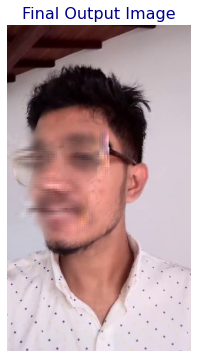

In [32]:
import cv2
import matplotlib.pyplot as plt

def display_final_image(image_path, title="Final Output Image"):
    """
    Displays an image with a clean and polished layout.
    
    Args:
        image_path (str): Path to the image to be displayed.
        title (str): Title of the displayed image.
    """
    try:
        # Load the image
        print(f"🔍 Loading image from: {image_path}")
        image = cv2.imread(image_path)
        
        # Check if the image is loaded properly
        if image is None:
            print(f"Error: Unable to load the image. Please verify the path: {image_path}")
            return
        
        # Convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.figure(figsize=(8, 6))  # Adjust the figure size for better visualization
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels for a cleaner look
        plt.title(f"{title}", fontsize=16, color="darkblue")  # Add a styled title
        plt.show()
        
    except Exception as e:
        # Handle any unexpected errors
        print(f"An error occurred while displaying the image: {e}")

# Path to the final image
image_path = '/kaggle/working/final/0150.jpg'

# Display the final image
display_final_image(image_path)


# Plotting the original frame

🔍 Loading image from: /kaggle/working/frames/0150.jpg


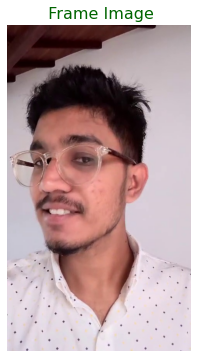

In [33]:
import cv2
import matplotlib.pyplot as plt

def display_frame_image(image_path, title="Frame Image"):
    """
    Displays an image from the frames directory with a clean and polished layout.
    
    Args:
        image_path (str): Path to the image to be displayed.
        title (str): Title of the displayed image.
    """
    try:
        # Load the image
        print(f"🔍 Loading image from: {image_path}")
        image = cv2.imread(image_path)
        
        # Check if the image is loaded properly
        if image is None:
            print(f"Error: Unable to load the image. Please verify the path: {image_path}")
            return
        
        # Convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.figure(figsize=(8, 6))  # Adjust the figure size for better visualization
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels for a cleaner look
        plt.title(f" {title}", fontsize=16, color="darkgreen")  # Add a styled title
        plt.show()
        
    except Exception as e:
        # Handle any unexpected errors
        print(f" An error occurred while displaying the image: {e}")

# Path to the frame image
image_path = '/kaggle/working/frames/0150.jpg'

# Display the frame image
display_frame_image(image_path)


# Video rebuilding

In [34]:
import os
import cv2
import numpy as np

# Initialize a list to store frames
frames = []

# Path to the directory containing the images
image_dir = '/kaggle/working/final'

# Loop through filenames with zero-padded format
for i in range(1701):
    # Generate zero-padded filenames (e.g., 0001.jpg, 0002.jpg)
    filename = f"{i:04d}.jpg"
    image_path = os.path.join(image_dir, filename)

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Unable to load image {filename}. Skipping.")
        continue

    # Get dimensions and append the frame
    height, width, layers = image.shape
    frames.append(image)

# Convert frames to a numpy array
frames = np.array(frames)

# Create a VideoWriter object
output_video_path = '/kaggle/working/deepfake.avi'
videomaker = cv2.VideoWriter(
    output_video_path,
    cv2.VideoWriter_fourcc(*'DIVX'),
    25,
    (width, height)
)

# Write frames to the video
print("🔍 Writing frames to video...")
for frame in frames:
    videomaker.write(frame)

# Release the video writer
videomaker.release()
print(f"✅ Video saved successfully at {output_video_path}")


🔍 Writing frames to video...
✅ Video saved successfully at /kaggle/working/deepfake.avi


In [35]:
import os

# Define the directory to list
working_directory = '/kaggle/working/'

# List the contents of the directory
try:
    contents = os.listdir(working_directory)
    print(f"Contents of {working_directory}:")
    for item in contents:
        print(item)
except Exception as e:
    print(f"An error occurred while listing the directory: {e}")


ls: cannot access 'import': No such file or directory
ls: cannot access 'os': No such file or directory
Contents of /kaggle/working/:
final
transformed
deepfake.avi
frames
results


In [ ]:
import os
import zipfile

def zip_directory(source_dir, output_zip):
    print(f"🔍 Zipping contents of: {source_dir}")
    try:
        with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, dirs, files in os.walk(source_dir):
                for file in files:
                    file_path = os.path.join(root, file)
                    arcname = os.path.relpath(file_path, source_dir)  # Preserve folder structure in the zip
                    zipf.write(file_path, arcname)
        print(f"✅ Successfully created zip file: {output_zip}")
    except Exception as e:
        print(f"An error occurred while zipping: {e}")

# Define paths
source_directory = '/kaggle/working/'
output_zip_path = '/kaggle/working/output.zip'

# Zip the directory
zip_directory(source_directory, output_zip_path)


In [ ]:
import os
from tqdm import tqdm

def delete_files_with_extension(directory, extension):
    try:
        # Collect all files with the specified extension
        files_to_delete = [
            os.path.join(root, file)
            for root, _, files in os.walk(directory)
            for file in files if file.endswith(extension)
        ]
        
        if not files_to_delete:
            print(f"✅ No files with extension '{extension}' found in {directory}.")
            return

        print(f"🔍 Deleting all '{extension}' files in {directory}...")
        
        # Delete files with a progress bar
        for file in tqdm(files_to_delete, desc="Deleting Files", unit="file", bar_format="{l_bar}{bar} | {n_fmt}/{total_fmt}"):
            os.remove(file)
        
        print(f"✅ Successfully deleted {len(files_to_delete)} '{extension}' files.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Define the directory and file extension
directory = '/kaggle/working/'
extension = '.jpg'

# Execute the deletion
delete_files_with_extension(directory, extension)
